<a href="https://colab.research.google.com/github/maVovk/Sample-ML-Repo/blob/hw06/06.Overfitting%20Problem/tinkoff_generation_3_linear_regression_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### (0 баллов) Считываем данные

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

dataset = load_boston()
dataset.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

Каждая квартира имеет 13 признаков:

In [4]:
X = dataset['data']
X[:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

In [ ]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

In [5]:
y = dataset['target']
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.



In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)

In [ ]:
prediction_linear = model.predict(X_test)
prediction_linear[:10]

array([32.3725689 , 39.399941  , 20.03494729, 41.46678123, 15.36777793,
       24.64353121, 13.5692729 , 31.00528776, 21.24252206, 16.89058117])

### (2 балл) Валидация результата

Напишите свою функцию MSE, убедитесь, что она совпадает с реализацией из sklearn и посчитайте своей результат на тестовой части.

In [8]:
from sklearn.metrics import mean_squared_error

def MSE(y_real, y_pred):
    return  np.sum( np.power((y_real - y_pred), 2) ) / y_real.size

In [ ]:
print(f'MSE собственной реализации: {MSE(y_test, prediction_linear)}')
print(f'MSE из sklearn: {mean_squared_error(y_test, prediction_linear)}')

MSE собственной реализации: 11.425799484326681
MSE из sklearn: 11.425799484326681


Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [ ]:
def naive_prediction(X_train, y_train):
    return np.mean(y_train)

naive_predictions = np.array([naive_prediction(X_train, y_train)] * y_test.size)
naive_predictions[:10]

array([22.67538462, 22.67538462, 22.67538462, 22.67538462, 22.67538462,
       22.67538462, 22.67538462, 22.67538462, 22.67538462, 22.67538462])

In [ ]:
print(f'MSE модели: {MSE(y_test, prediction_linear)}')
print(f'MSE наивного алгоритма: {MSE(y_test, naive_predictions)}')

MSE модели: 11.425799484326681
MSE наивного алгоритма: 82.53456066829098


### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

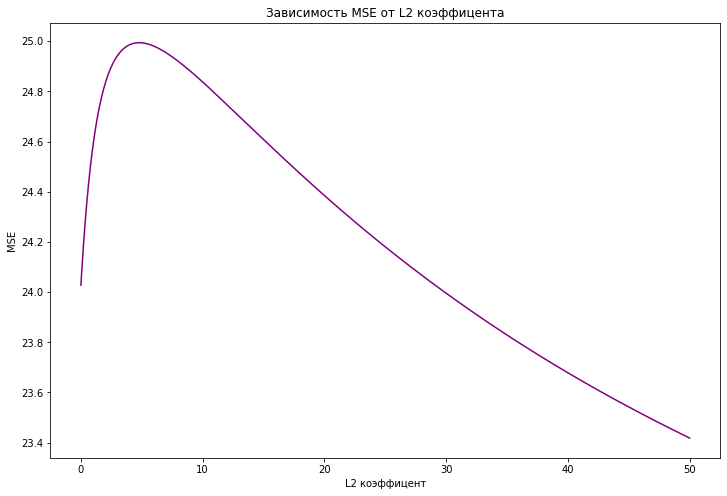

CPU times: user 3.4 s, sys: 1.66 ms, total: 3.4 s
Wall time: 3.43 s


In [9]:
%%time

from sklearn.linear_model import Ridge

mse_results = []
steps = np.linspace(50, 0.01, 5000)  # коэффиценты регуляризации

for l2 in steps:
    ridgeModel = Ridge(alpha=l2).fit(X_train, y_train)
    
    prediction_ridge = ridgeModel.predict(X_test)
    mse_results.append(MSE(y_test, prediction_ridge))
    
plt.figure(figsize=(12, 8))
plt.plot(steps, mse_results, color='purple')
plt.title('Зависимость MSE от L2 коэффицента')
plt.xlabel('L2 коэффицент')
plt.ylabel('MSE')
plt.show()

Лучший коэффицент: 150.33, минимальная ошибка: 29.75



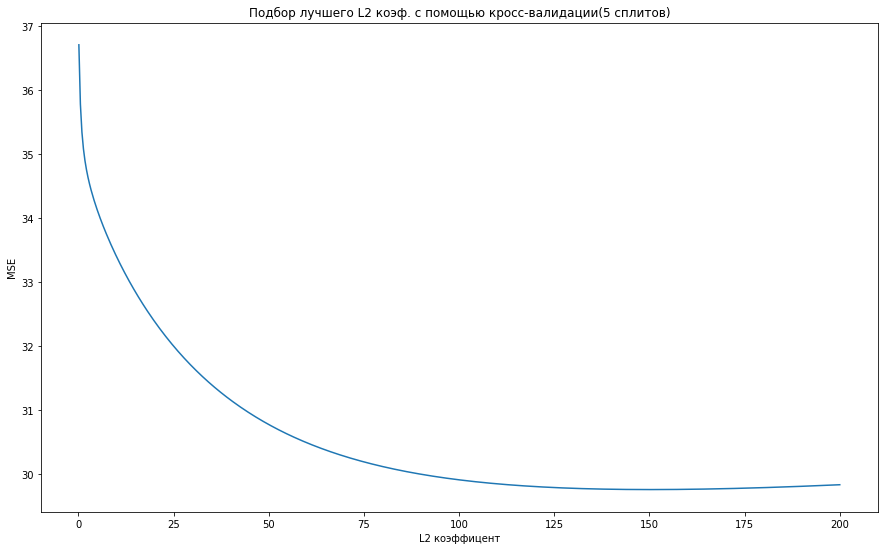

In [22]:
from sklearn.model_selection import cross_val_score

plt.figure(figsize=(15, 9))
steps = np.linspace(200, 0.1, 500)
lambda_errors = []

for val in steps:
  errors = -cross_val_score(Ridge(alpha=val), X, y, cv=5, scoring='neg_mean_squared_error')

  lambda_errors.append((val, np.mean(errors)))

best_alpha, min_error = min(lambda_errors, key=lambda x: x[1])

print(f'Лучший коэффицент: {best_alpha:.2f}, минимальная ошибка: {min_error:.2f}\n')

lambda_errors = np.array(lambda_errors)

plt.plot(steps, lambda_errors[:, 1])
plt.title('Подбор лучшего L2 коэф. с помощью кросс-валидации(5 сплитов)')
plt.ylabel('MSE')
plt.xlabel('L2 коэффицент')
plt.show()

Помогает ли регуляризация? Какой коэффициент регуляризации надо выбрать, чтобы ошибка была минимальной? Чему при этом равна ошибка? Напишите выводы о проведенных экспериментах

Регуляризация позволяет значительно улучшить точность. При коэффиценте регуляризации 150, средняя MSE при кросс-валидации равняется 29.8. 

Выводы: при подборе коэффицента удобнее всего использовать кросс-валидацию, иначе многое зависит от рандома train_test_split'а. Также надо увеличивать границы поиска, до момента, когда начинается повторный рост ошибки, чтобы получить наилучший результат(значений, близких у нулю не касается, т.к зачем тогда регуляризация?)